In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Appending new rows to DataFrames

In [3]:
names = pd.read_csv('data/names.csv')
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2


In [3]:
new_data_list = ['Aria', 1]
names.loc[4] = new_data_list
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [4]:
names.loc['five'] = ['Zach', 3]
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3


In [5]:
names.loc[len(names)] = {'Name':'Zayd', 'Age':2}
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2


In [6]:
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2


In [7]:
names.loc[len(names)] = pd.Series({'Age':32, 'Name':'Dean'})
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2
7,Dean,32


In [8]:
# Use append with fresh copy of names
names = pd.read_csv('data/names.csv')
names.append({'Name':'Aria', 'Age':1})

TypeError: Can only append a Series if ignore_index=True or if the Series has a name

In [9]:
names.append({'Name':'Aria', 'Age':1}, ignore_index=True)

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [10]:
names.index = ['Canada', 'Canada', 'USA', 'USA']
names

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2


In [11]:
names.append({'Name':'Aria', 'Age':1}, ignore_index=True)

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [12]:
s = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names))
s

Age        3
Name    Zach
Name: 4, dtype: object

In [13]:
names.append(s)

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2
4,Zach,3


In [14]:
s1 = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names))
s2 = pd.Series({'Name': 'Zayd', 'Age': 2}, name='USA')
names.append([s1, s2])

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2
4,Zach,3
USA,Zayd,2


In [15]:
bball_16 = pd.read_csv('data/baseball16.csv')
bball_16.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,altuvjo01,2016,1,HOU,AL,161,640,108,216,42,...,96.0,30.0,10.0,60,70.0,11.0,7.0,3.0,7.0,15.0
1,bregmal01,2016,1,HOU,AL,49,201,31,53,13,...,34.0,2.0,0.0,15,52.0,0.0,0.0,0.0,1.0,1.0
2,castrja01,2016,1,HOU,AL,113,329,41,69,16,...,32.0,2.0,1.0,45,123.0,0.0,1.0,1.0,0.0,9.0
3,correca01,2016,1,HOU,AL,153,577,76,158,36,...,96.0,13.0,3.0,75,139.0,5.0,5.0,0.0,3.0,12.0
4,gattiev01,2016,1,HOU,AL,128,447,58,112,19,...,72.0,2.0,1.0,43,127.0,6.0,4.0,0.0,5.0,12.0


In [16]:
data_dict = bball_16.iloc[0].to_dict()
print(data_dict)

{'playerID': 'altuvjo01', 'yearID': 2016, 'stint': 1, 'teamID': 'HOU', 'lgID': 'AL', 'G': 161, 'AB': 640, 'R': 108, 'H': 216, '2B': 42, '3B': 5, 'HR': 24, 'RBI': 96.0, 'SB': 30.0, 'CS': 10.0, 'BB': 60, 'SO': 70.0, 'IBB': 11.0, 'HBP': 7.0, 'SH': 3.0, 'SF': 7.0, 'GIDP': 15.0}


In [17]:
new_data_dict = {k: '' if isinstance(v, str) else np.nan for k, v in data_dict.items()}
print(new_data_dict)

{'playerID': '', 'yearID': nan, 'stint': nan, 'teamID': '', 'lgID': '', 'G': nan, 'AB': nan, 'R': nan, 'H': nan, '2B': nan, '3B': nan, 'HR': nan, 'RBI': nan, 'SB': nan, 'CS': nan, 'BB': nan, 'SO': nan, 'IBB': nan, 'HBP': nan, 'SH': nan, 'SF': nan, 'GIDP': nan}


## There's more...

In [18]:
random_data = []
for i in range(1000):
    d = dict()
    for k, v in data_dict.items():
        if isinstance(v, str):
            d[k] = np.random.choice(list('abcde'))
        else:
            d[k] = np.random.randint(10)
    random_data.append(pd.Series(d, name=i + len(bball_16)))
    
random_data[0].head()

2B    9
3B    2
AB    7
BB    0
CS    1
Name: 16, dtype: object

In [19]:
%%timeit
bball_16_copy = bball_16.copy()
for row in random_data:
    bball_16_copy = bball_16_copy.append(row)

5.05 s ± 187 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%%timeit
bball_16_copy = bball_16.copy()
bball_16_copy = bball_16_copy.append(random_data)

74.3 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Concatenating multiple DataFrames together

In [21]:
stocks_2016 = pd.read_csv('data/stocks_2016.csv', index_col='Symbol')
stocks_2017 = pd.read_csv('data/stocks_2017.csv', index_col='Symbol')

In [22]:
stocks_2016

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [23]:
stocks_2017

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [24]:
s_list = [stocks_2016, stocks_2017]
pd.concat(s_list)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [25]:
pd.concat(s_list, keys=['2016', '2017'], names=['Year', 'Symbol'])

Shares  Low  High
Year Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300

In [26]:
pd.concat(s_list, keys=['2016', '2017'], axis='columns', names=['Year', None])

Year   2016                2017              
     Shares   Low   High Shares    Low   High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0
GE      NaN   NaN    NaN  100.0   30.0   40.0
IBM     NaN   NaN    NaN   87.0   75.0   95.0
SLB     NaN   NaN    NaN   20.0   55.0   85.0
TSLA   50.0  80.0  130.0  100.0  100.0  300.0
TXN     NaN   NaN    NaN  500.0   15.0   23.0
WMT    40.0  55.0   70.0    NaN    NaN    NaN

In [27]:
pd.concat(s_list, join='inner', keys=['2016', '2017'], axis='columns', names=['Year', None])

Year     2016            2017          
       Shares Low High Shares  Low High
Symbol                                 
AAPL       80  95  110     50  120  140
TSLA       50  80  130    100  100  300

## There's more...

In [28]:
stocks_2016.append(stocks_2017)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [56]:
stocks_2015 = stocks_2016.copy()

In [58]:
stocks_2017

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


possibly add rule for no duplicate index

# Comparing President Trump's and Obama's approval rating

In [54]:
base_url = 'http://www.presidency.ucsb.edu/data/popularity.php?pres={}'
trump_url = base_url.format(45)

df_list = pd.read_html(trump_url)
len(df_list)

14

In [15]:
df0 = df_list[0]
df0.shape

(308, 1794)

In [16]:
df0.head(7)

,0,1,2,3,4,5,6,7,8,9,...,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Document Archive • Public Papers of the Presi...,Document Archive • Public Papers of the Presi...,Document Archive • Public Papers of the Presi...,NaN,NaN,Document Archive,• Public Papers of the Presidents,• State of the Union Addresses & Messages,• Inaugural Addresses,• Farewell Addresses,...,NaN,01/20/2017,01/22/2017,NaN,45.0,45.0,10,Question:,Do you approve or disapprove of the way [first...,data adapted from the Gallup Poll and compiled...


In [55]:
df_list = pd.read_html(trump_url, match='Start Date')
len(df_list)

3

In [56]:
df_list = pd.read_html(trump_url, match='Start Date', attrs={'align':'center'})
len(df_list)

1

In [26]:
trump = df_list[0]
trump.shape

(249, 19)

In [27]:
trump.head(8)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,>84 84-67 66-55 54-50 49-45 44-40 39-35 ...,>84,84-67,66-55,54-50,49-45,44-40,39-35,34-25,<25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,>84,84-67,66-55,54-50,49-45,44-40,39-35,34-25,<25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,%,%,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,President,Start Date,End Date,NaN,Approving,Disapproving,unsure/no data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Donald J. Trump,09/23/2017,09/25/2017,NaN,39,56,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,09/22/2017,09/24/2017,NaN,39,54,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_list = pd.read_html(trump_url, match='Start Date', attrs={'align':'center'}, 
                       header=0, skiprows=[0,1,2,3,5], parse_dates=['Start Date', 'End Date'])
trump = df_list[0]
trump.head()

,President,Start Date,End Date,Unnamed: 3,Approving,Disapproving,unsure/no data,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Donald J. Trump,2017-09-23,2017-09-25,NaN,39,56,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2017-09-22,2017-09-24,NaN,39,54,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2017-09-21,2017-09-23,NaN,40,54,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2017-09-20,2017-09-22,NaN,37,56,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2017-09-19,2017-09-21,NaN,38,56,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
trump = trump.dropna(axis=1, how='all')
trump.head()

,President,Start Date,End Date,Approving,Disapproving,unsure/no data
0,Donald J. Trump,2017-09-23,2017-09-25,39,56,5
1,NaN,2017-09-22,2017-09-24,39,54,7
2,NaN,2017-09-21,2017-09-23,40,54,6
3,NaN,2017-09-20,2017-09-22,37,56,7
4,NaN,2017-09-19,2017-09-21,38,56,6


In [47]:
trump.isnull().sum()

President         242
Start Date          0
End Date            0
Approving           0
Disapproving        0
unsure/no data      0
dtype: int64

In [51]:
trump = trump.ffill()
trump.head()

,President,Start Date,End Date,Approving,Disapproving,unsure/no data
0,Donald J. Trump,2017-09-23,2017-09-25,39,56,5
1,Donald J. Trump,2017-09-22,2017-09-24,39,54,7
2,Donald J. Trump,2017-09-21,2017-09-23,40,54,6
3,Donald J. Trump,2017-09-20,2017-09-22,37,56,7
4,Donald J. Trump,2017-09-19,2017-09-21,38,56,6


In [52]:
trump.dtypes

President                 object
Start Date        datetime64[ns]
End Date          datetime64[ns]
Approving                  int64
Disapproving               int64
unsure/no data             int64
dtype: object

In [2]:
def get_pres_appr(pres_num):
    base_url = 'http://www.presidency.ucsb.edu/data/popularity.php?pres={}'
    pres_url = base_url.format(pres_num)
    df_list = pd.read_html(pres_url, match='Start Date', attrs={'align':'center'}, 
                       header=0, skiprows=[0,1,2,3,5], parse_dates=['Start Date', 'End Date'])
    pres = df_list[0].copy()
    pres = pres.dropna(axis=1, how='all')
    pres['President'] = pres['President'].ffill()
    return pres.sort_values('End Date').reset_index(drop=True)

In [3]:
obama = get_pres_appr(44)
obama.head()

,President,Start Date,End Date,Approving,Disapproving,unsure/no data
0,Barack Obama,2009-01-21,2009-01-23,68,12,21
1,Barack Obama,2009-01-22,2009-01-24,69,13,18
2,Barack Obama,2009-01-23,2009-01-25,67,14,19
3,Barack Obama,2009-01-24,2009-01-26,65,15,20
4,Barack Obama,2009-01-25,2009-01-27,64,16,20


In [137]:
pres_41_45 = pd.concat([get_pres_appr(x) for x in range(41,46)], ignore_index=True)
pres_41_45.groupby('President').head(3)

,President,Start Date,End Date,Approving,Disapproving,unsure/no data
0,George Bush,1989-01-24,1989-01-26,51,6,43
1,George Bush,1989-02-24,1989-02-27,60,11,27
2,George Bush,1989-02-28,1989-03-02,62,13,24
158,William J. Clinton,1993-01-24,1993-01-26,58,20,22
159,William J. Clinton,1993-01-29,1993-01-31,53,30,16
160,William J. Clinton,1993-02-12,1993-02-14,51,33,15
386,George W. Bush,2001-02-01,2001-02-04,57,25,18
387,George W. Bush,2001-02-09,2001-02-11,57,24,17
388,George W. Bush,2001-02-19,2001-02-21,61,21,16
656,Barack Obama,2009-01-21,2009-01-23,68,12,21


In [341]:
pres_41_45['End Date'].value_counts().head(8)

1990-08-26    2
1990-03-11    2
1999-02-09    2
2013-10-10    2
1990-08-12    2
1992-11-22    2
1990-05-22    2
1991-09-30    1
Name: End Date, dtype: int64

In [342]:
pres_41_45 = pres_41_45.drop_duplicates(subset='End Date')

In [343]:
pres_41_45.shape

(3679, 7)

In [345]:
pres_41_45['President'].value_counts()

Barack Obama          2786
George W. Bush         270
Donald J. Trump        243
William J. Clinton     227
George Bush            153
Name: President, dtype: int64

In [346]:
pres_41_45.groupby('President', sort=False).median().round(1)

,Approving,Disapproving,unsure/no data
President,,,
George Bush,62.0,22.0,9.0
William J. Clinton,57.0,36.0,6.0
George W. Bush,50.5,45.5,4.0
Barack Obama,47.0,47.0,7.0
Donald J. Trump,39.0,56.0,6.0


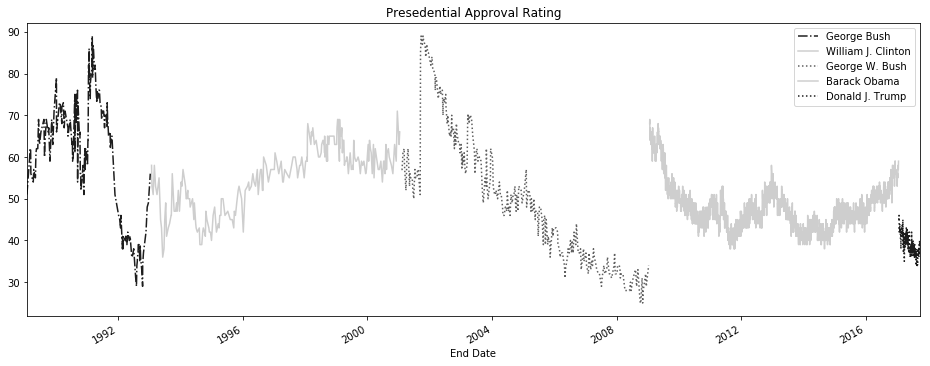

In [322]:
from matplotlib import cm
fig, ax = plt.subplots(figsize=(16,6))

styles = ['-.', '-', ':', '-', ':']
colors = [.9, .3, .7, .3, .9]
groups = pres_41_45.groupby('President', sort=False)

for style, color, (pres, df) in zip(styles, colors, groups):
    df.plot('End Date', 'Approving', ax=ax, label=pres, style=style, color=cm.Greys(color), 
            title='Presedential Approval Rating')

In [506]:
pres_41_45['Days in Office'] = pres_41_45.groupby('President')['End Date'].transform(lambda x: x - x.iloc[0])
pres_41_45.groupby('President').head(3)

,President,Start Date,End Date,Approving,Disapproving,unsure/no data,Days in Office
0,George Bush,1989-01-24,1989-01-26,51,6,43,0 days
1,George Bush,1989-02-24,1989-02-27,60,11,27,32 days
2,George Bush,1989-02-28,1989-03-02,62,13,24,35 days
158,William J. Clinton,1993-01-24,1993-01-26,58,20,22,0 days
159,William J. Clinton,1993-01-29,1993-01-31,53,30,16,5 days
160,William J. Clinton,1993-02-12,1993-02-14,51,33,15,19 days
386,George W. Bush,2001-02-01,2001-02-04,57,25,18,0 days
387,George W. Bush,2001-02-09,2001-02-11,57,24,17,7 days
388,George W. Bush,2001-02-19,2001-02-21,61,21,16,17 days
656,Barack Obama,2009-01-21,2009-01-23,68,12,21,0 days


In [507]:
pres_41_45.dtypes

President                  object
Start Date         datetime64[ns]
End Date           datetime64[ns]
Approving                   int64
Disapproving                int64
unsure/no data              int64
Days in Office    timedelta64[ns]
dtype: object

In [452]:
pres_41_45['Days in Office'] = pres_41_45['Days in Office'].astype('int')
pres_41_45['Days in Office'].head()

0     0
1    32
2    35
3    43
4    46
Name: Days in Office, dtype: int64

In [453]:
pres_pivot = pres_41_45.pivot(index='Days in Office', columns='President', values='Approving')
pres_pivot.head()

President,Barack Obama,Donald J. Trump,George Bush,George W. Bush,William J. Clinton
Days in Office,,,,,
0,68.0,45.0,51.0,57.0,58.0
1,69.0,45.0,NaN,NaN,NaN
2,67.0,46.0,NaN,NaN,NaN
3,65.0,46.0,NaN,NaN,NaN
4,64.0,45.0,NaN,NaN,NaN


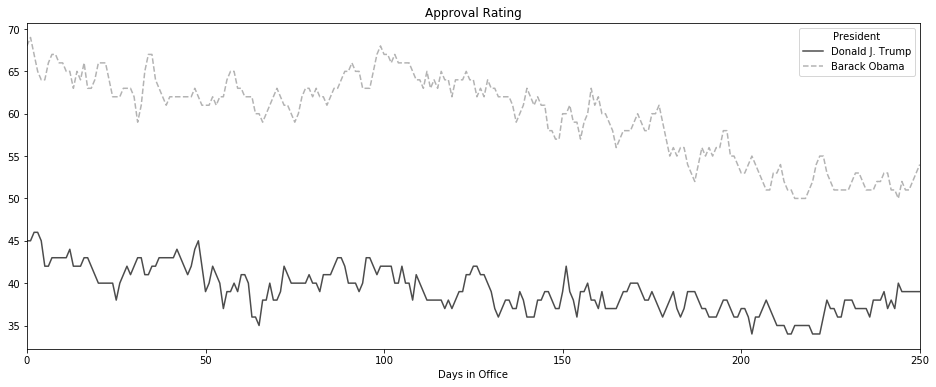

In [607]:
plot_kwargs = dict(figsize=(16,6), color=cm.gray([.3, .7]), style=['-', '--'], title='Approval Rating')
pres_pivot.loc[:250, ['Donald J. Trump', 'Barack Obama']].ffill().plot(**plot_kwargs)

## There's more...

In [600]:
pres_rm = pres_41_45.groupby('President', sort=False) \
                    .rolling('90D', on='End Date')['Approving'] \
                    .mean()
pres_rm.head()

President    End Date  
George Bush  1989-01-26    51.000000
             1989-02-27    55.500000
             1989-03-02    57.666667
             1989-03-10    58.750000
             1989-03-13    58.200000
Name: Approving, dtype: float64

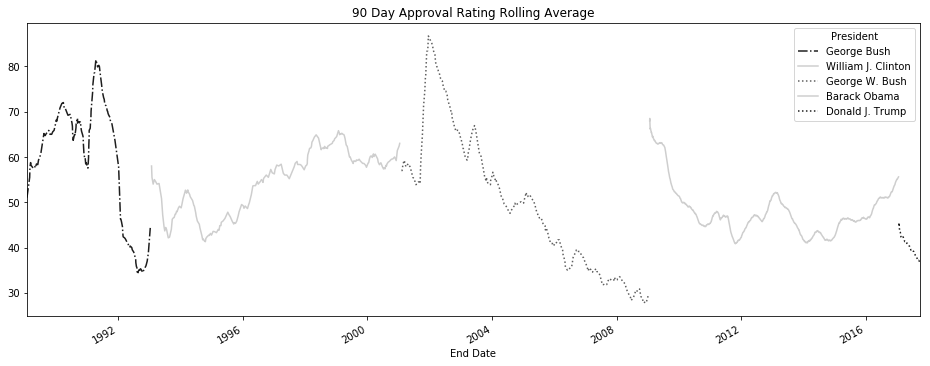

In [608]:
styles = ['-.', '-', ':', '-', ':']
colors = [.9, .3, .7, .3, .9]
color = cm.Greys(colors)
title='90 Day Approval Rating Rolling Average'
plot_kwargs = dict(figsize=(16,6), style=styles, color = color, title=title)
correct_col_order = pres_41_45.President.unique()
pres_rm.unstack('President')[correct_col_order].plot(**plot_kwargs)

# Replicating concat with merge and join

In [76]:
from IPython.display import display_html

years = 2016, 2017, 2018
stock_tables = [pd.read_csv('data/stocks_{}.csv'.format(year), index_col='Symbol') 
                for year in years]

def display_frames(frames, num_spaces=0):
    t_style = '<table style="display: inline;"'
    tables_html = [df.to_html().replace('<table', t_style) for df in frames]

    space = '&nbsp;' * num_spaces
    display_html(space.join(tables_html), raw=True)

display_frames(stock_tables, 30)
stocks_2016, stocks_2017, stocks_2018 = stock_tables

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85


In [78]:
pd.concat(stock_tables, keys=[2016, 2017, 2018])

Shares  Low  High
     Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300
2018 AAPL        40  135   170
     AMZN         8  900  1125
     TSLA        50  220   400

In [80]:
pd.concat(dict(zip(years,stock_tables)), axis='columns')

2016                2017                 2018               
     Shares   Low   High Shares    Low   High Shares    Low    High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0   40.0  135.0   170.0
AMZN    NaN   NaN    NaN    NaN    NaN    NaN    8.0  900.0  1125.0
GE      NaN   NaN    NaN  100.0   30.0   40.0    NaN    NaN     NaN
IBM     NaN   NaN    NaN   87.0   75.0   95.0    NaN    NaN     NaN
SLB     NaN   NaN    NaN   20.0   55.0   85.0    NaN    NaN     NaN
TSLA   50.0  80.0  130.0  100.0  100.0  300.0   50.0  220.0   400.0
TXN     NaN   NaN    NaN  500.0   15.0   23.0    NaN    NaN     NaN
WMT    40.0  55.0   70.0    NaN    NaN    NaN    NaN    NaN     NaN

In [93]:
stocks_2016.join(stocks_2017, lsuffix='_2016', rsuffix='_2017', how='outer')

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017
Symbol,,,,,,
AAPL,80.0,95.0,110.0,50.0,120.0,140.0
GE,NaN,NaN,NaN,100.0,30.0,40.0
IBM,NaN,NaN,NaN,87.0,75.0,95.0
SLB,NaN,NaN,NaN,20.0,55.0,85.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN


In [90]:
stocks_2016

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [96]:
other = [stocks_2017.add_suffix('_2017'), stocks_2018.add_suffix('_2018')]
stocks_2016.add_suffix('_2016').join(other, how='outer')

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
AAPL,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0
GE,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TSLA,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
WMT,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
stock_join = stocks_2016.add_suffix('_2016').join(other, how='outer')
stock_concat = pd.concat(dict(zip(years,stock_tables)), axis='columns')

In [105]:
stock_concat.columns = stock_concat.columns.get_level_values(1) + '_' + \
                            stock_concat.columns.get_level_values(0).astype(str)

In [106]:
stock_concat

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
AAPL,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0
GE,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TSLA,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
WMT,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
step1 = stocks_2016.merge(stocks_2017, left_index=True, right_index=True, 
                          how='outer', suffixes=('_2016', '_2017'))
stock_merge = step1.merge(stocks_2018.add_suffix('_2018'), 
                          left_index=True, right_index=True, how='outer')

stock_concat.equals(stock_merge)

True

In [ ]:
data/fo

In [172]:
names = ['prices', 'transactions']
food_tables = [pd.read_csv('data/food_{}.csv'.format(name)) for name in names]
food_prices, food_transactions = food_tables
display_frames(food_tables, 30)

,item,store,price,Date
0,pear,A,0.99,2017
1,pear,B,1.99,2017
2,peach,A,2.99,2017
3,peach,B,3.49,2017
4,banana,A,0.39,2017
5,banana,B,0.49,2017
6,steak,A,5.99,2017
7,steak,B,6.99,2017
8,steak,B,4.99,2015
,custid,item,store,quantity


In [173]:
food_transactions.merge(food_prices, on=['item', 'store'])

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017
1,1,banana,A,10,0.39,2017
2,2,steak,B,3,6.99,2017
3,2,steak,B,3,4.99,2015
4,2,steak,B,1,6.99,2017
5,2,steak,B,1,4.99,2015
6,2,pear,B,1,1.99,2017
7,2,peach,B,2,3.49,2017


In [176]:
food_transactions.merge(food_prices.query('Date == 2017'), how='left')

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017.0
1,1,banana,A,10,0.39,2017.0
2,2,steak,B,3,6.99,2017.0
3,2,pear,B,1,1.99,2017.0
4,2,peach,B,2,3.49,2017.0
5,2,steak,B,1,6.99,2017.0
6,2,coconut,B,4,NaN,NaN


In [182]:
food_prices_join = food_prices.query('Date == 2017').set_index(['item', 'store'])
food_prices_join

price  Date
item   store             
pear   A       0.99  2017
       B       1.99  2017
peach  A       2.99  2017
       B       3.49  2017
banana A       0.39  2017
       B       0.49  2017
steak  A       5.99  2017
       B       6.99  2017

In [183]:
food_transactions.join(food_prices_join, on=['item', 'store'])

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017.0
1,1,banana,A,10,0.39,2017.0
2,2,steak,B,3,6.99,2017.0
3,2,pear,B,1,1.99,2017.0
4,2,peach,B,2,3.49,2017.0
5,2,steak,B,1,6.99,2017.0
6,2,coconut,B,4,NaN,NaN


In [186]:
pd.concat([food_transactions.set_index(['item', 'store']), 
           food_prices.set_index(['item', 'store'])], axis='columns')

Exception: cannot handle a non-unique multi-index!

In [278]:
import glob

df_list = []
for filename in glob.glob('data/gas prices/*.csv'):
    df_list.append(pd.read_csv(filename, index_col='Week', parse_dates=['Week']))

gas = pd.concat(df_list, axis='columns')
gas.head()

,All Grades,Diesel,Midgrade,Premium,Regular
Week,,,,,
2017-09-25,2.701,2.788,2.859,3.105,2.583
2017-09-18,2.750,2.791,2.906,3.151,2.634
2017-09-11,2.800,2.802,2.953,3.197,2.685
2017-09-04,2.794,2.758,2.946,3.191,2.679
2017-08-28,2.513,2.605,2.668,2.901,2.399


# Connecting to SQL Databases

In [283]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/chinook.db')

In [294]:
tracks = pd.read_sql_table('tracks', engine)
tracks.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [298]:
genres = pd.read_sql_table('genres', engine)
genres.head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


In [322]:
genre_track = genres.merge(tracks[['GenreId', 'Milliseconds']], 
                           on='GenreId', how='left') \
                     .drop('GenreId', axis='columns')

genre_track['Milliseconds'] = pd.to_timedelta(genre_track['Milliseconds'], unit='ms')
genre_track.head()

,Name,Milliseconds
0,Rock,00:05:43.719000
1,Rock,00:05:42.562000
2,Rock,00:03:50.619000
3,Rock,00:04:12.051000
4,Rock,00:06:15.418000


In [321]:
genre_time = genre_track.groupby('Name')['Milliseconds'].mean()
pd.to_timedelta(genre_time, unit='ms').dt.floor('s').sort_values()

Name
Rock And Roll        00:02:14
Opera                00:02:54
Hip Hop/Rap          00:02:58
Easy Listening       00:03:09
Bossa Nova           00:03:39
R&B/Soul             00:03:40
World                00:03:44
Pop                  00:03:49
Latin                00:03:52
Alternative & Punk   00:03:54
Soundtrack           00:04:04
Reggae               00:04:07
Alternative          00:04:24
Blues                00:04:30
Rock                 00:04:43
Jazz                 00:04:51
Classical            00:04:53
Heavy Metal          00:04:57
Electronica/Dance    00:05:02
Metal                00:05:09
Comedy               00:26:25
TV Shows             00:35:45
Drama                00:42:55
Science Fiction      00:43:45
Sci Fi & Fantasy     00:48:31
Name: Milliseconds, dtype: timedelta64[ns]

In [352]:
cust = pd.read_sql_table('customers', engine, 
                         columns=['CustomerId', 'FirstName', 'LastName'])
invoice = pd.read_sql_table('invoices', engine, 
                            columns=['InvoiceId','CustomerId'])
ii = pd.read_sql_table('invoice_items', engine, 
                       columns=['InvoiceId', 'UnitPrice', 'Quantity'])

In [353]:
cust_inv = cust.merge(invoice, on='CustomerId') \
               .merge(ii, on='InvoiceId')
cust_inv.head()

,CustomerId,FirstName,LastName,InvoiceId,UnitPrice,Quantity
0,1,Luís,Gonçalves,98,1.99,1
1,1,Luís,Gonçalves,98,1.99,1
2,1,Luís,Gonçalves,121,0.99,1
3,1,Luís,Gonçalves,121,0.99,1
4,1,Luís,Gonçalves,121,0.99,1


In [350]:
cust_inv.assign(Total = cust_inv['Quantity'] * cust_inv['UnitPrice']) \
        .groupby(['CustomerId', 'FirstName', 'LastName'])['Total'] \
        .sum() \
        .sort_values(ascending=False).head()

CustomerId  FirstName  LastName  
6           Helena     Holý          49.62
26          Richard    Cunningham    47.62
57          Luis       Rojas         46.62
46          Hugh       O'Reilly      45.62
45          Ladislav   Kovács        45.62
Name: Total, dtype: float64

## There's more...

In [363]:
pd.read_sql_query('select * from tracks limit 5', engine)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [375]:
sql_string1 = '''
select 
    Name, 
    time(avg(Milliseconds) / 1000, 'unixepoch') as avg_time
from (
        select 
            g.Name, 
            t.Milliseconds
        from 
            genres as g 
        join
            tracks as t
            on 
                g.genreid == t.genreid
    )
group by 
    Name
order by 
    avg_time
'''
pd.read_sql_query(sql_string1, engine)

,Name,avg_time
0,Rock And Roll,00:02:14
1,Opera,00:02:54
2,Hip Hop/Rap,00:02:58
3,Easy Listening,00:03:09
4,Bossa Nova,00:03:39
5,R&B/Soul,00:03:40
6,World,00:03:44
7,Pop,00:03:49
8,Latin,00:03:52
9,Alternative & Punk,00:03:54


In [385]:
sql_string2 = '''
select 
      c.customerid, 
      c.FirstName, 
      c.LastName, 
      sum(ii.quantity *  ii.unitprice) as Total
from
     customers as c
join
     invoices as i
          on c.customerid = i.customerid
join
    invoice_items as ii
          on i.invoiceid = ii.invoiceid
group by
    c.customerid, c.FirstName, c.LastName
order by
    Total desc
'''
pd.read_sql_query(sql_string2, engine)

,CustomerId,FirstName,LastName,Total
0,6,Helena,Holý,49.62
1,26,Richard,Cunningham,47.62
2,57,Luis,Rojas,46.62
3,45,Ladislav,Kovács,45.62
4,46,Hugh,O'Reilly,45.62
5,37,Fynn,Zimmermann,43.62
6,24,Frank,Ralston,43.62
7,28,Julia,Barnett,43.62
8,25,Victor,Stevens,42.62
9,7,Astrid,Gruber,42.62
